In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from scipy import stats
from sklearn.datasets import load_boston

boston = load_boston()

bostonDF = pd.DataFrame(boston.data, columns= boston.feature_names)

bostonDF["PRICE"] = boston.target
print('Boston 데이터 크기: ',bostonDF.shape)

Boston 데이터 크기:  (506, 14)


In [2]:
bostonDF.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [3]:
bostonDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  PRICE    506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


#### 모두 float 형이며 null 값은 없다. 각 피처별 회귀 결과에 미치는 영향을 시각화 하겠다.

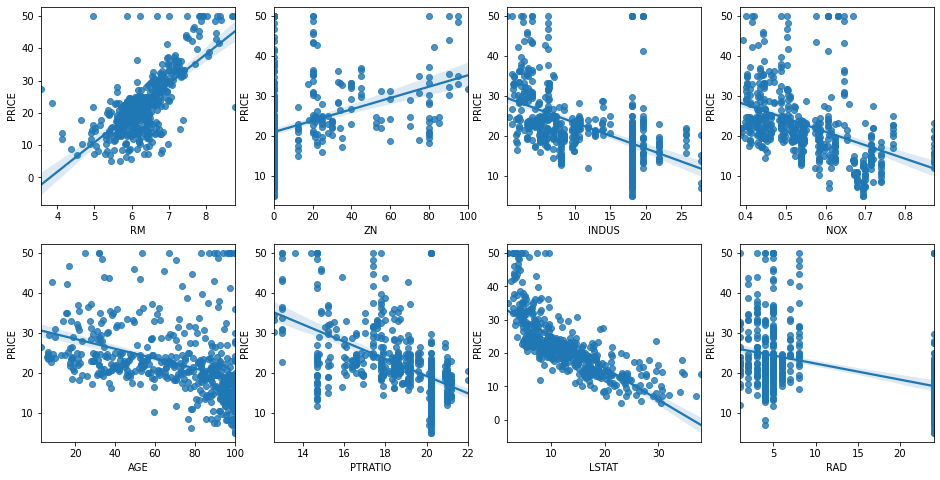

In [4]:
fig, axs = plt.subplots(figsize=(16,8), ncols=4, nrows=2)
lm_features = ["RM","ZN","INDUS","NOX","AGE","PTRATIO","LSTAT","RAD"]
for i, feature in enumerate(lm_features):
    row = int(i/4)
    col = i % 4
    
    sns.regplot(x=feature, y='PRICE', data=bostonDF, ax=axs[row][col])
    
    

#### RM(방 개수)는 양 방향의 선형성을 보이고, LSTAT(하위 계층 비율)는 음 방향의 선형성을 보인다.

In [7]:
from sklearn.model_selection import train_test_split

y_target = bostonDF["PRICE"]
X_data = bostonDF.drop(["PRICE"],axis=1, inplace=False)

def get_boston_dataset():
    return train_test_split(X_data,y_target, test_size=0.3, random_state=156)